In [1]:
import matplotlib.pyplot as plt
import torch

In [2]:
IMG_PATH = '/kaggle/input/gorkovskaya/photo_2022-10-06_15-01-53.jpg'

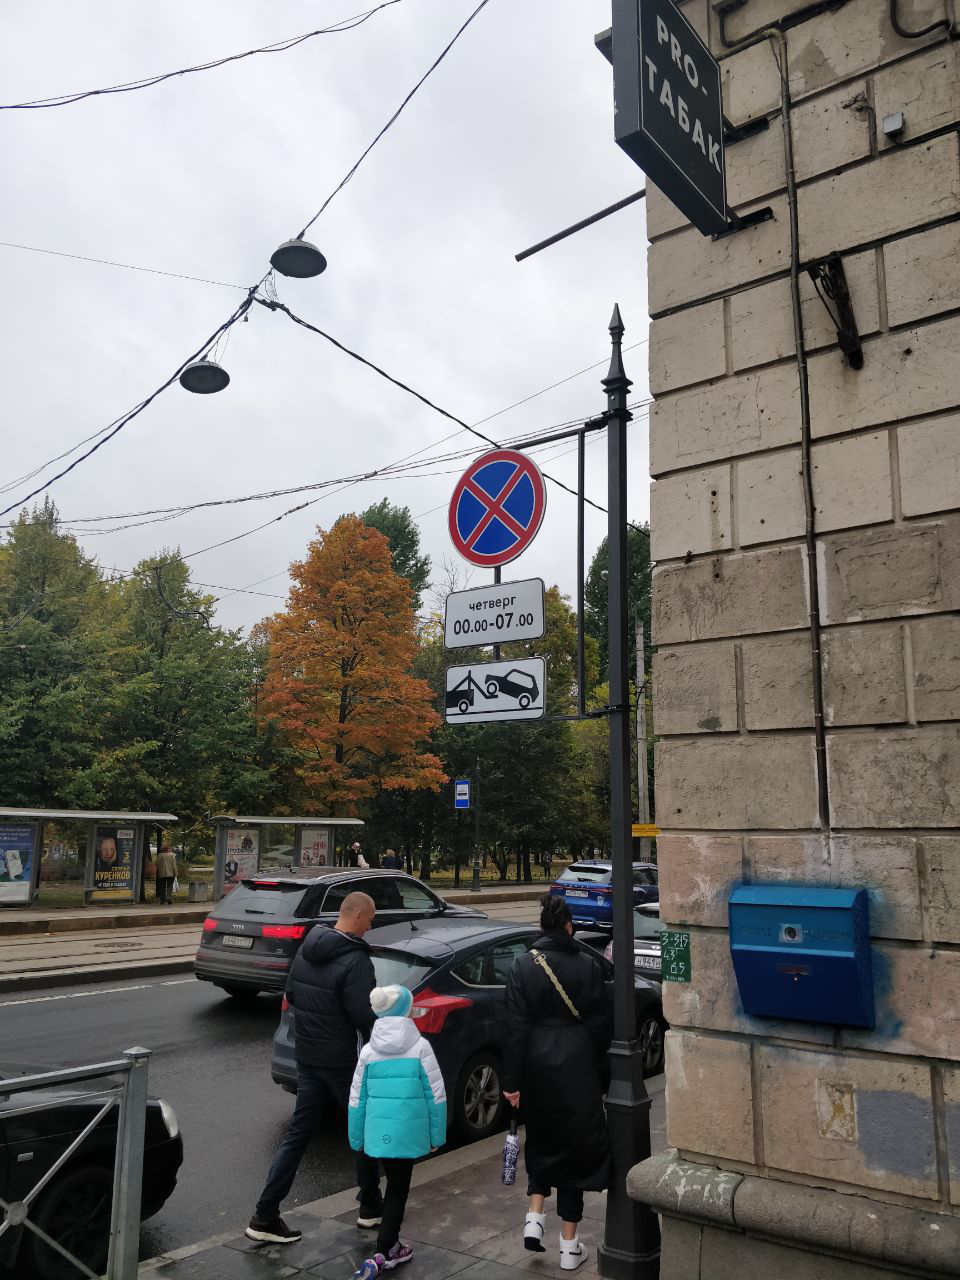

In [3]:
from PIL import Image

img = Image.open(IMG_PATH)
img

In [6]:
!git clone https://github.com/CSAILVision/semantic-segmentation-pytorch

Cloning into 'semantic-segmentation-pytorch'...
remote: Enumerating objects: 1170, done.
remote: Total 1170 (delta 0), reused 0 (delta 0), pack-reused 1170
Receiving objects: 100% (1170/1170), 5.04 MiB | 4.01 MiB/s, done.
Resolving deltas: 100% (707/707), done.


In [7]:
code = f"""#!/bin/bash

# Image and model names
TEST_IMG={IMG_PATH}
MODEL_NAME=ade20k-resnet50dilated-ppm_deepsup
MODEL_PATH=ckpt/$MODEL_NAME
RESULT_PATH=./

ENCODER=$MODEL_NAME/encoder_epoch_20.pth
DECODER=$MODEL_NAME/decoder_epoch_20.pth

# Download model weights and image
if [ ! -e $MODEL_PATH ]; then
  mkdir -p $MODEL_PATH
fi
if [ ! -e $ENCODER ]; then
  wget -P $MODEL_PATH http://sceneparsing.csail.mit.edu/model/pytorch/$ENCODER
fi
if [ ! -e $DECODER ]; then
  wget -P $MODEL_PATH http://sceneparsing.csail.mit.edu/model/pytorch/$DECODER
fi
if [ ! -e $TEST_IMG ]; then
  wget -P $RESULT_PATH http://sceneparsing.csail.mit.edu/data/ADEChallengeData2016/images/validation/$TEST_IMG
fi

if [ -z "$DOWNLOAD_ONLY" ]
then

# Inference
python3 -u my_test.py \
  --imgs $TEST_IMG \
  --cfg config/ade20k-resnet50dilated-ppm_deepsup.yaml \
  DIR $MODEL_PATH \
  TEST.result ./ \
  TEST.checkpoint epoch_20.pth

fi"""

with open('/kaggle/working/semantic-segmentation-pytorch/get_segmentation.sh', 'w') as f:
    f.write(code)

In [45]:
with open('/kaggle/working/semantic-segmentation-pytorch/test.py', 'r') as test_py:
    lines = test_py.readlines()
    lines.insert(45, '    print(pred)\n')
    lines[46] = '    Image.fromarray((np.stack([pred, pred, pred], axis=2) + 1).astype(np.uint8)).save("mask.png")\n'

with open('/kaggle/working/semantic-segmentation-pytorch/my_test.py', 'w') as test_py:
    test_py.write(''.join(lines))

In [46]:
!cd /kaggle/working && cd semantic-segmentation-pytorch && chmod +x get_segmentation.sh && ./get_segmentation.sh

--2022-11-13 14:55:47--  http://sceneparsing.csail.mit.edu/model/pytorch/ade20k-resnet50dilated-ppm_deepsup/encoder_epoch_20.pth
Resolving sceneparsing.csail.mit.edu (sceneparsing.csail.mit.edu)... 128.30.195.26
Connecting to sceneparsing.csail.mit.edu (sceneparsing.csail.mit.edu)|128.30.195.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95015426 (91M)
Saving to: ‘ckpt/ade20k-resnet50dilated-ppm_deepsup/encoder_epoch_20.pth.1’

encoder_epoch_20.pt 100%[===================>]  90.61M  16.2MB/s    in 6.9s    

2022-11-13 14:55:55 (13.2 MB/s) - ‘ckpt/ade20k-resnet50dilated-ppm_deepsup/encoder_epoch_20.pth.1’ saved [95015426/95015426]

--2022-11-13 14:55:55--  http://sceneparsing.csail.mit.edu/model/pytorch/ade20k-resnet50dilated-ppm_deepsup/decoder_epoch_20.pth
Resolving sceneparsing.csail.mit.edu (sceneparsing.csail.mit.edu)... 128.30.195.26
Connecting to sceneparsing.csail.mit.edu (sceneparsing.csail.mit.edu)|128.30.195.26|:80... connected.
HTTP request sent,

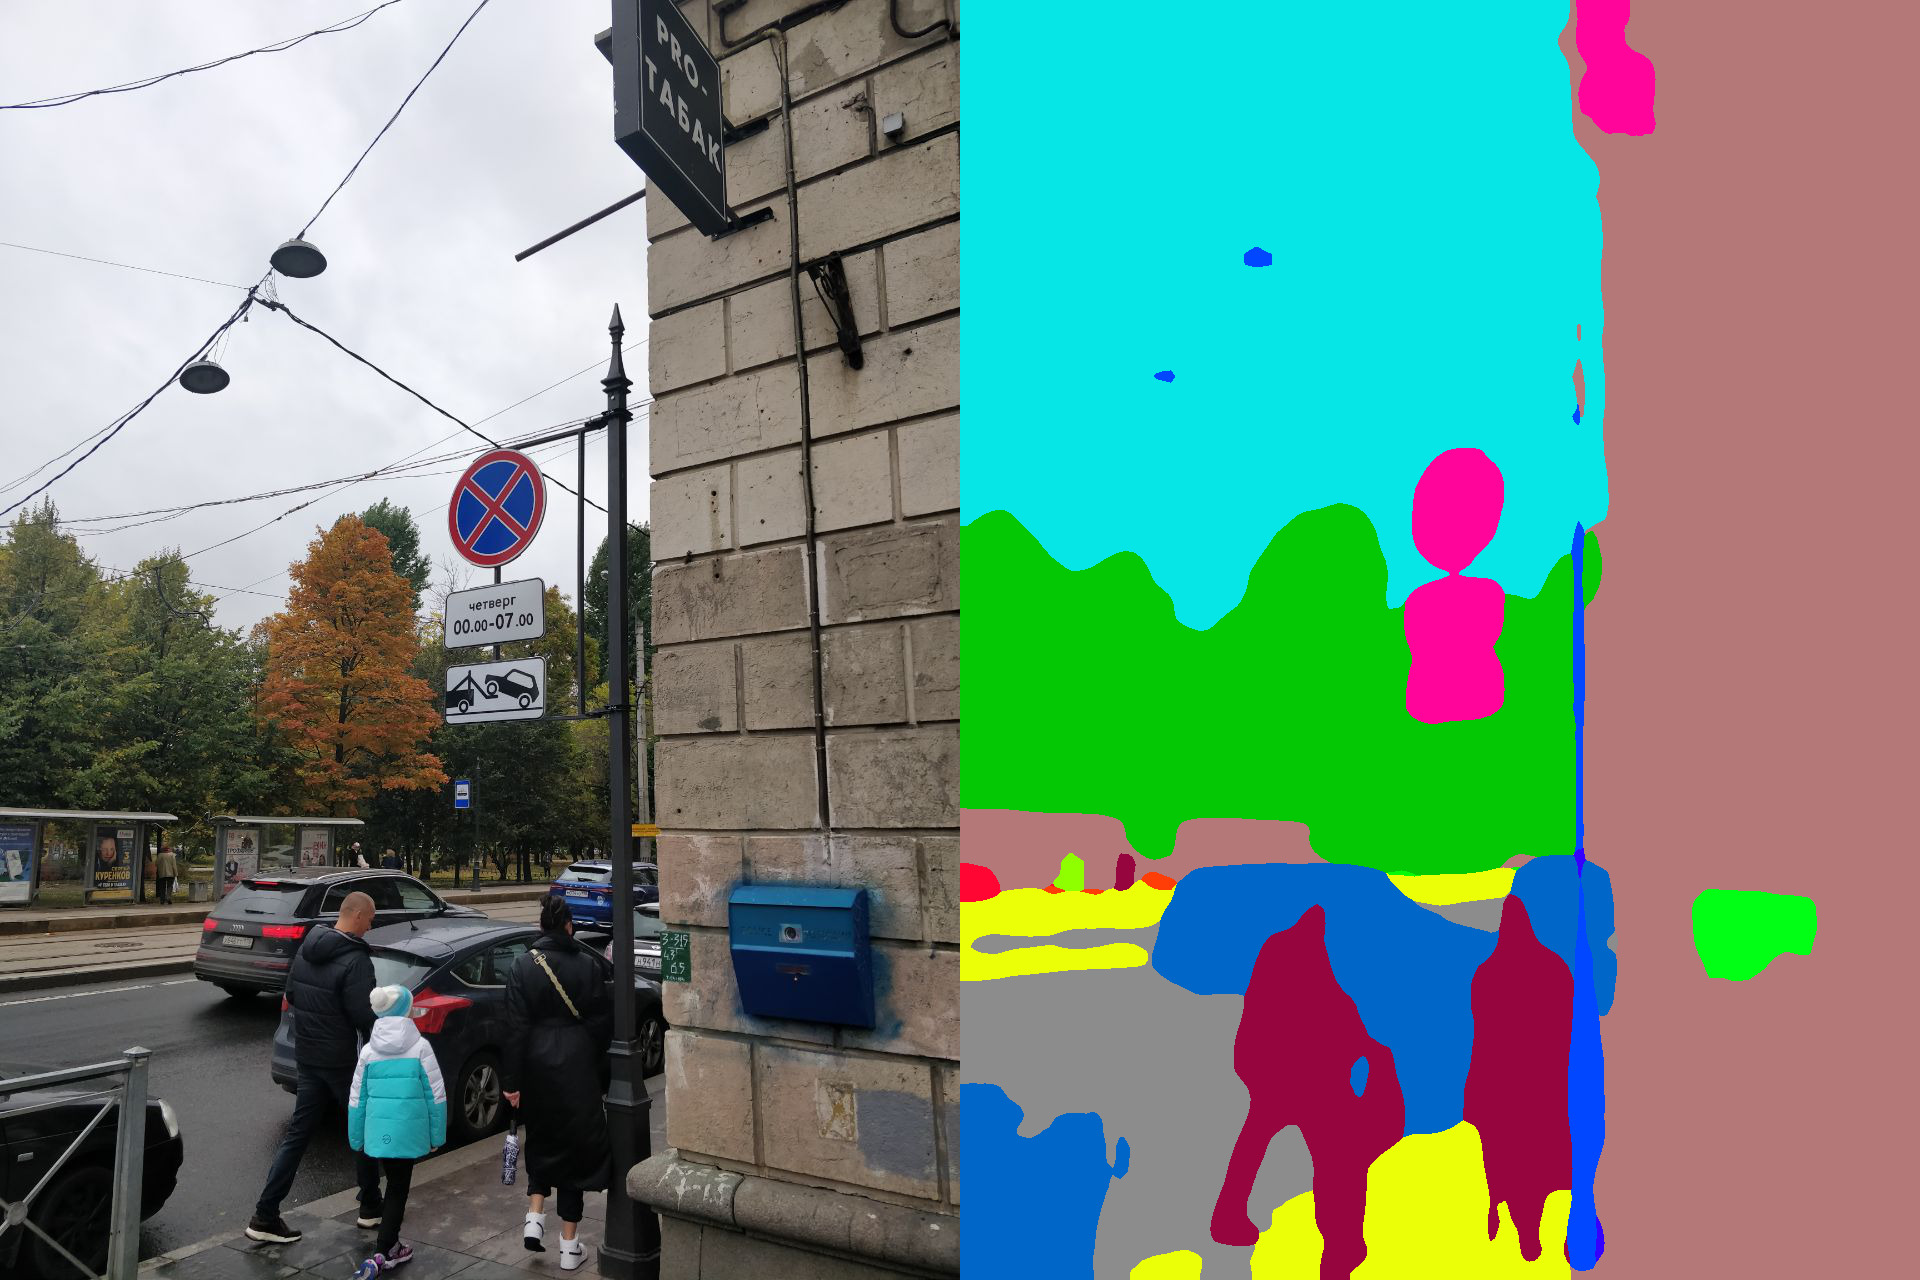

In [47]:
Image.open('/kaggle/working/semantic-segmentation-pytorch/photo_2022-10-06_15-01-53.png')

In [10]:
!git clone https://github.com/NVlabs/SPADE.git && cd SPADE/ && pip install -r requirements.txt && \
    cd models/networks/ && \
    git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch && \
    cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm . && \
    cd ../../

Cloning into 'SPADE'...
remote: Enumerating objects: 481, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 481 (delta 128), reused 107 (delta 107), pack-reused 315
Receiving objects: 100% (481/481), 21.94 MiB | 8.37 MiB/s, done.
Resolving deltas: 100% (175/175), done.
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161
Receiving objects: 100% (188/188), 47.20 KiB | 273.00 KiB/s, done.
Resolving deltas: 100% (106/106), done.


In [ ]:
!conda install -y gdown
!gdown --id 12gvlTbMvUcJewQlSEaZdeb2CdOB-b8kQ

Solving environment: | 

In [27]:
!tar xvf checkpoints.tar.gz

./
./checkpoints.tar.gz
./coco_pretrained/
./coco_pretrained/latest_net_G.pth
./ade20k_pretrained/
./ade20k_pretrained/latest_net_G.pth
./cityscapes_pretrained/
./cityscapes_pretrained/latest_net_G.pth


In [56]:
!mkdir ade20k_samples && cp /kaggle/working/semantic-segmentation-pytorch/photo_2022-10-06_15-01-53.png ade20k_samples/_val_img1.jpg && \
                         cp /kaggle/working/semantic-segmentation-pytorch/mask.png ade20k_samples/_val_img1.png

In [57]:
!cd SPADE && python test.py --name ade20k_pretrained --dataset_mode ade20k --dataroot /kaggle/working/ade20k_samples --checkpoints_dir /kaggle/working

----------------- Options ---------------
             aspect_ratio: 1.0                           
                batchSize: 1                             
      cache_filelist_read: False                         
     cache_filelist_write: False                         
          checkpoints_dir: /kaggle/working               	[default: ./checkpoints]
   contain_dontcare_label: True                          
                crop_size: 256                           
                 dataroot: /kaggle/working/ade20k_samples	[default: ./datasets/cityscapes/]
             dataset_mode: ade20k                        	[default: coco]
          display_winsize: 256                           
                  gpu_ids: 0                             
                 how_many: inf                           
                init_type: xavier                        
            init_variance: 0.02                          
                  isTrain: False                         	[default: Non

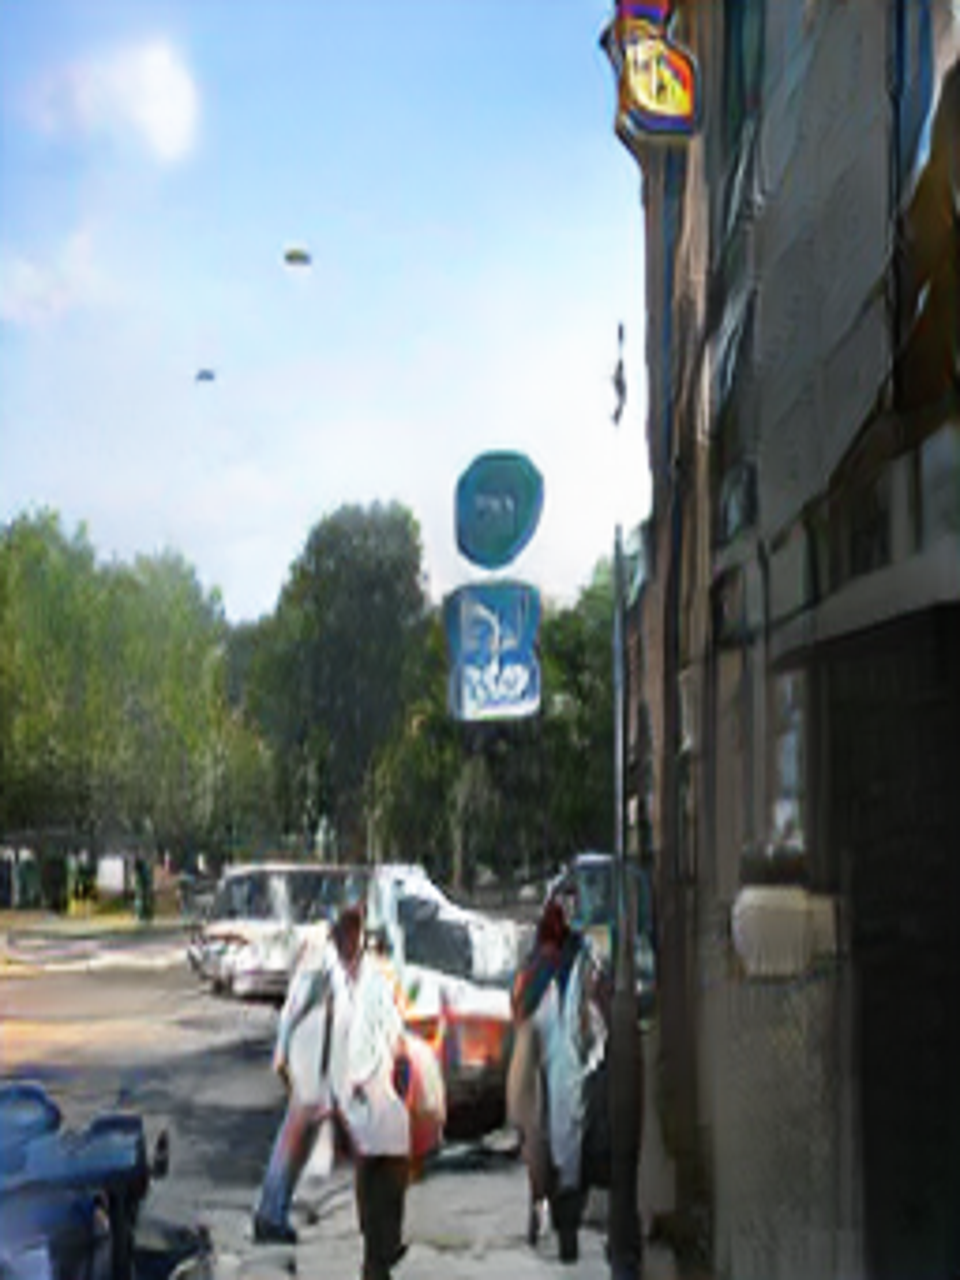

In [62]:
Image.open('SPADE/results/ade20k_pretrained/test_latest/images/synthesized_image/_val_img1.png').resize((960, 1280))

In [54]:
!ls -la SPADE/results/ade20k_pretrained/test_latest/images/synthesized_image

total 120
drwxr-xr-x 2 root root   4096 Nov 13 14:53 .
drwxr-xr-x 4 root root   4096 Nov 13 14:53 ..
-rw-r--r-- 1 root root 110967 Nov 13 14:56 _val_img1.png
